In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
Y_train.shape

(50000, 1)

In [8]:
Y_test.shape

(10000, 1)

In [9]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
Y_test = Y_test.reshape(-1,)

In [12]:
classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
def plot_sample(X, Y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

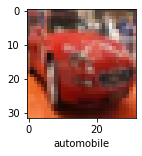

In [16]:
plot_sample(X_train, Y_train, 5)

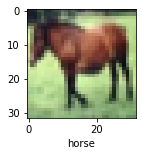

In [28]:
plot_sample(X_train, Y_train, 7)

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8098 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6188 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5396 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4796 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4298 - accuracy: 0.4955


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]
print('classification report: \n', classification_report(Y_test,Y_pred_classes))

313/313 [==============================] - 3s 10ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.44      0.63      0.52      1000
           1       0.64      0.59      0.61      1000
           2       0.44      0.23      0.30      1000
           3       0.45      0.11      0.18      1000
           4       0.44      0.34      0.39      1000
           5       0.37      0.41      0.39      1000
           6       0.67      0.27      0.38      1000
           7       0.29      0.81      0.43      1000
           8       0.54      0.65      0.59      1000
           9       0.64      0.42      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



In [32]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

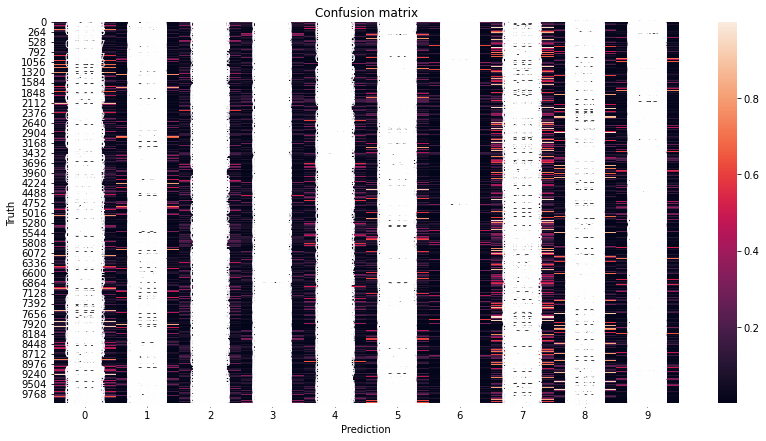

In [33]:
plt.figure(figsize = (14,7))
sns.heatmap(Y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5065 - accuracy: 0.4565
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1346 - accuracy: 0.6013
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0110 - accuracy: 0.6484
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9328 - accuracy: 0.6760
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8754 - accuracy: 0.6961
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8256 - accuracy: 0.7149
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7819 - accuracy: 0.7295
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7455 - accuracy: 0.7403
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7072 - accuracy: 0.7559
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [39]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9314 - accuracy: 0.6903


[0.9314169883728027, 0.6902999877929688]

In [40]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[1.0293934e-03, 6.6132561e-05, 4.2042013e-02, 6.2069422e-01,
        5.5609727e-03, 2.4394824e-01, 3.7322629e-02, 3.6340978e-04,
        4.7837883e-02, 1.1350812e-03],
       [7.3719333e-04, 2.7202913e-01, 2.2295964e-05, 2.1260594e-07,
        2.2354223e-08, 3.6458871e-09, 6.3622703e-09, 5.9997123e-09,
        7.2678554e-01, 4.2555129e-04],
       [7.5512514e-02, 2.6717383e-01, 3.5183986e-03, 1.8414162e-03,
        1.7092684e-03, 2.3196010e-04, 3.1405500e-05, 2.6339164e-03,
        6.2267464e-01, 2.4672640e-02],
       [9.0661633e-01, 5.9105894e-03, 5.4739531e-02, 5.1332556e-04,
        1.1392296e-03, 3.0120641e-06, 4.9479725e-04, 1.7091338e-04,
        2.9665766e-02, 7.4644992e-04],
       [4.7031049e-06, 5.1261259e-06, 9.0548769e-02, 1.6050555e-02,
        7.4657464e-01, 1.5516828e-03, 1.4507909e-01, 7.9528209e-06,
        1.7594108e-04, 1.5063297e-06]], dtype=float32)

In [41]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:5]

[3, 8, 8, 0, 4]

In [42]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

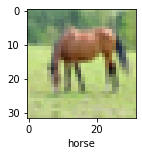

In [48]:
plot_sample(X_test, Y_test, 60)

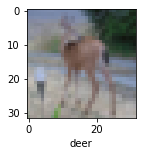

In [44]:
plot_sample(X_test, Y_test, 100)

In [49]:
classes[Y_classes[60]]

'horse'